In [9]:
###############1.线性可分/硬间隔最大化####################
#==================== Part 0: Basic Function ====================
import numpy as np

x = np.array([[1,2],[4,3],[2,2],[3,2],[1,1],[2.5,1.5],[3.5,1.5],[2.9,2.8]])
y= np.array([-1,1,-1,1,-1,-1,1,1])
n=len(y)
y= y.reshape((n,1))
x= x.reshape((n,2))
X = np.hstack((np.ones((n,1)),x)) 
print(X)

[[ 1.   1.   2. ]
 [ 1.   4.   3. ]
 [ 1.   2.   2. ]
 [ 1.   3.   2. ]
 [ 1.   1.   1. ]
 [ 1.   2.5  1.5]
 [ 1.   3.5  1.5]
 [ 1.   2.9  2.8]]


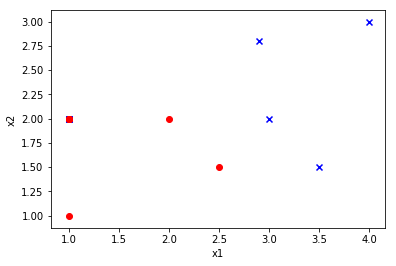

In [10]:
#%% ==================== Part 1: Plotting ====================
#We start the exercise by first plotting the data to understand the the problem we are working with.
import matplotlib.pyplot as plt

def plotData(x,y):
    fig = plt.figure()  
    ax= fig.add_subplot(111) #使画在一个图上
    
    pos = np.where(y[:]==1) #y为类似矩阵形式，所以要再取第一列
    neg = np.where(y[:]==-1)
    ax1 = plt.scatter(x[pos,0], x[pos,1], marker = 'x', color = 'b')  
    ax2 = plt.scatter(x[neg,0], x[neg,1], marker = 'o', color = 'r')  
    plt.xlabel('x1') 
    plt.ylabel('x2')
    plt.show()

plotData(x,y)

In [14]:
#============ Part 2: Compute Cost and Gradient ============
m,n = X.shape

alpha = 0.01
iterations=1000
w = np.zeros((n , 1))

#Compute and display initial cost and gradient
def sign1(z):
    for i in range(len(z)):
        if z[i]>=0:
            z[i]=1
        else:
            z[i]=0
    return z
    
def costFunction(w, x, y):
    x=x.reshape((1,n))
    J = -(y*(np.dot(x,w)))
    return J

def gradientDescent(X,y,alpha,iterations):
    global w
    for i in range(iterations):
        for j in range(m):
            if np.sum(np.dot(X[j],w))*y[j] <= 0:
                w = w+alpha*y[j]*X[j].reshape((n,1))
                #plotPerc(w,X,y)
                #break #若每次只更新一个数据 可以break
    return w

final_theta = gradientDescent(X,y,alpha,iterations)

print(final_theta)

[[-0.23 ]
 [ 0.093]
 [-0.014]]


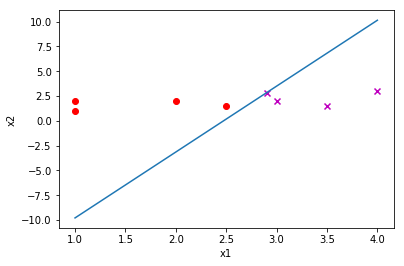

In [16]:
#%% ============= Part 3: Visualizing J(theta_0, theta_1) =============
def plotPerc(final_theta,X,y):
    fig = plt.figure()  
    ax= fig.add_subplot(111) #使画在一个图上
    
    pos = np.where(y[:,0]==1) #y为类似矩阵形式，所以要再取第一列
    neg = np.where(y[:,0]==-1)
    
    ax1 = plt.scatter(x[pos,0], x[pos,1], marker = 'x', color = 'm')  
    ax2 = plt.scatter(x[neg,0], x[neg,1], marker = 'o', color = 'r')  
    
    plt.xlabel('x1') 
    plt.ylabel('x2')
    
    #final_theta = np.array([-25.161,0.206,0.201]).reshape((3,1))

    plotX = np.arange(1,5,1)
    plotY = (-final_theta[0]-final_theta[1]*plotX)/final_theta[2] 
    plt.plot(plotX,plotY)
    
    plt.show()

plotPerc(final_theta,X,y)